# MMA 869 Assignment - Question 1

Nick Nguyen - Updated August 18th, 2019

## Import Packages

In [1]:
import numpy as np
import pandas as pd
import scipy

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns
colours = sns.color_palette('Set2')
sns.set_style('whitegrid')
plt.set_cmap('Set2')

## Import Data

In [2]:
dat = pd.read_csv('./jewelry_customers.csv')

## Explore the Data

In [3]:
dat.shape

(505, 4)

In [4]:
dat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 4 columns):
Age              505 non-null int64
Income           505 non-null int64
SpendingScore    505 non-null float64
Savings          505 non-null float64
dtypes: float64(2), int64(2)
memory usage: 15.9 KB


In [5]:
dat.describe()

,Age,Income,SpendingScore,Savings
count,505.000000,505.000000,505.000000,505.000000
mean,59.019802,75513.291089,0.505083,11862.455867
std,24.140043,35992.922184,0.259634,4949.229253
min,17.000000,12000.000000,0.000000,0.000000
25%,34.000000,34529.000000,0.304792,6828.709702
50%,59.000000,75078.000000,0.368215,14209.932802
75%,85.000000,107100.000000,0.768279,16047.268331
max,97.000000,142000.000000,1.000000,20000.000000


In [6]:
dat.head(10)

,Age,Income,SpendingScore,Savings
0,58,77769,0.791329,6559.829923
1,59,81799,0.791082,5417.661426
2,62,74751,0.702657,9258.992965
3,59,74373,0.765680,7346.334504
4,87,17760,0.348778,16869.507130
5,29,131578,0.847034,3535.514352
6,54,76500,0.785198,6878.884249
7,87,42592,0.355290,18086.287158
8,83,34384,0.324719,14783.379086
9,84,27693,0.367063,17879.558906


The data is very clean.

Check for missing values:

In [7]:
dat.isnull().sum()

Age              0
Income           0
SpendingScore    0
Savings          0
dtype: int64

No missing values.

## EDA
### Histograms

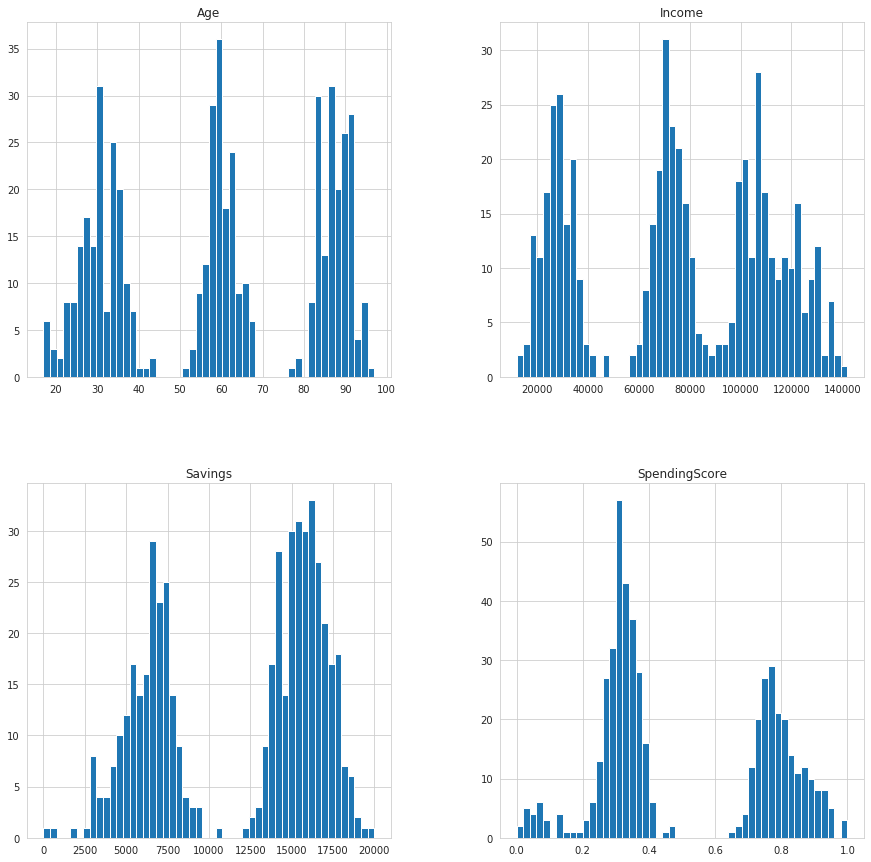

In [8]:
dat.hist(bins = 50, figsize = (15,15))
plt.show()

Looks like it's very "clustered", something to keep in mind.

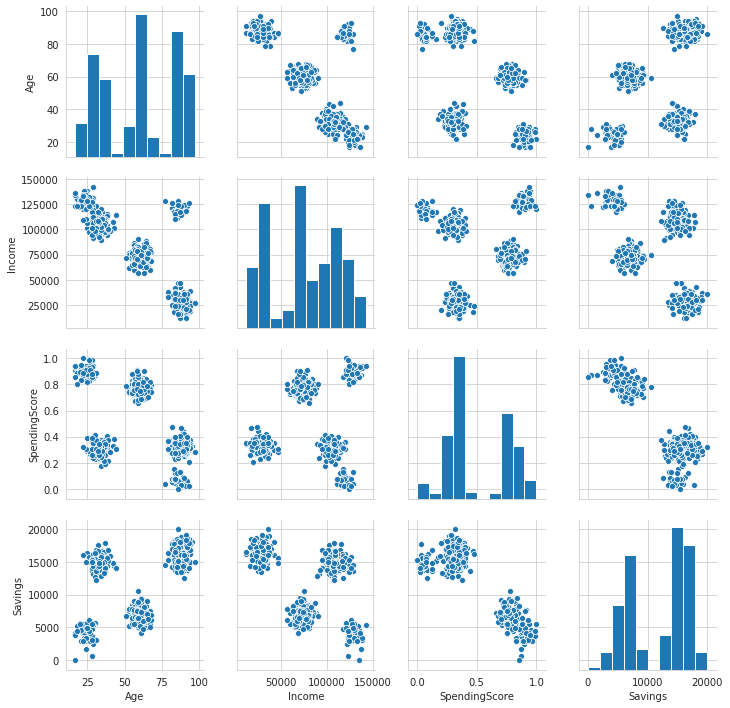

In [9]:
#sns.set()
sns.pairplot(dat, palette = colours)
plt.show()

Interesting. I guess time to build the clustering model...

## Standardizing Data

Here we use the `StandardScaler` from `scikit-learn` to standardize all variables to mean = 0, stdev = 1.

From the output table we can see everything worked well, the means are all close to 0 (something to the power of -16), and the standard deviations are all really close to 1.

In [10]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features = ['Age', 'Income', 'SpendingScore', 'Savings']
dat_sc = pd.DataFrame(scaler.fit_transform(dat), columns = features)
dat_sc.describe()

,Age,Income,SpendingScore,Savings
count,5.050000e+02,5.050000e+02,5.050000e+02,5.050000e+02
mean,5.672031e-17,-2.638154e-17,-1.954432e-16,-4.058360e-16
std,1.000992e+00,1.000992e+00,1.000992e+00,1.000992e+00
min,-1.742394e+00,-1.766355e+00,-1.947295e+00,-2.399206e+00
25%,-1.037472e+00,-1.139805e+00,-7.722011e-01,-1.018085e+00
50%,-8.211094e-04,-1.210579e-02,-5.276784e-01,4.747819e-01
75%,1.077295e+00,8.784513e-01,1.014725e+00,8.463867e-01
max,1.574888e+00,1.849048e+00,1.908103e+00,1.645835e+00


## Clustering Models

### k-means

We're going to start out with 5 clusters, as it looks that way from the pairs plot.

In [11]:
from sklearn.cluster import KMeans

k_means = KMeans(init='k-means++', n_clusters=5, n_init=10, random_state=42)
k_means.fit(dat_sc)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

#### Visualization

Just for fun, we will plot the pairs plot with the cluster labels on top. This way we can visualize the 4D relationship by a bunch of 2D plots.

Looking at the graphs below, everything is fairly distinct, except for clusters 0, 2, and 4 which seem to be all very close in `Savings`. However, these clusters differ in the other "dimensions", so they can be imagined as having the same x and y coordinates but different z. Kind of like two airplanes directly on top of eachother if looked at from below but are at different altitudes.

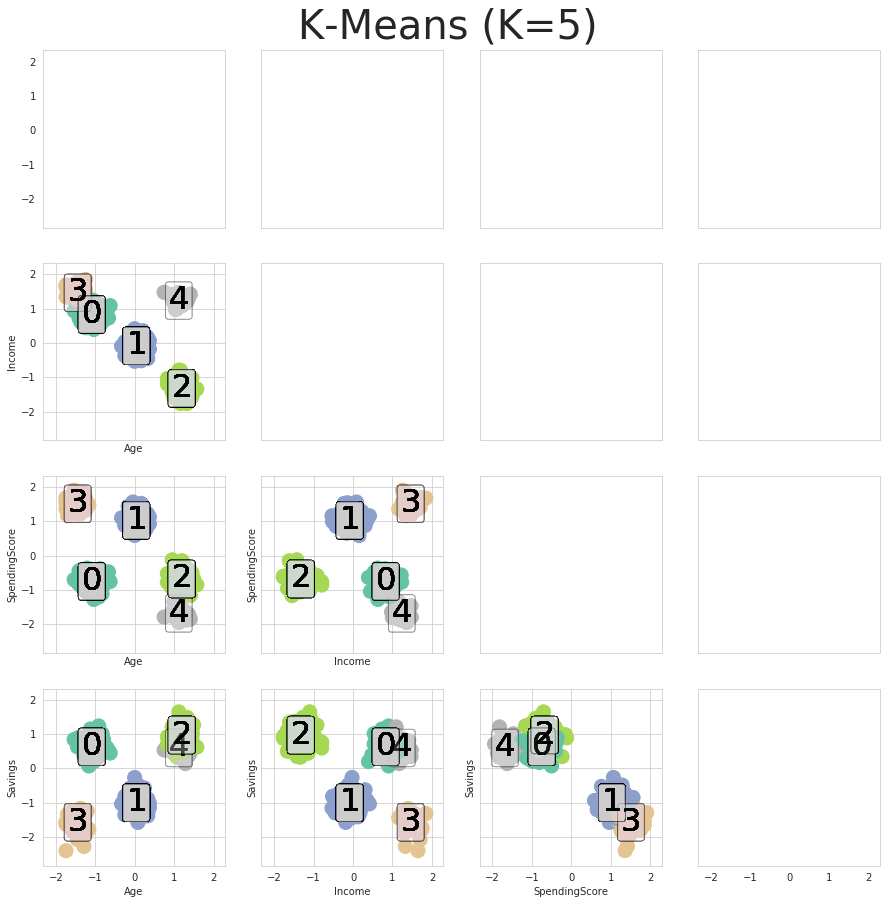

In [12]:
fig, ax = plt.subplots(4, 4, figsize=(15,15), sharex = True, sharey = True)
fig.suptitle('K-Means (K=5)', fontsize = 40, y = 0.92)
plt.set_cmap('Set2')

why = [['WHY', 'DID', 'I', 'SPEND'],
      ['', 'TWO', 'HOURS', 'ON'],
      ['', '', 'CREATING', 'THIS'],
      ['', '', '', 'GRAPH']]

for i in range(0, 4):
    for j in range(0, 4):
        if i <= j:
            ax[i][j].grid(False)
            # ax[i][j].text(-0.1, 0, why[i][j], fontsize = 30, ha = 'center', va = 'center')
        else:
            ax[i][j].grid(True);
            #plt.set_cmap('Set2')
            ax[i][j].scatter(dat_sc.iloc[:, j], dat_sc.iloc[:, i], s=200, c=k_means.labels_);
            #plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:, 1], marker='x', s=500, c="black")
            #plt.title("K-Means (K=5)", fontsize=20);
            ax[i][j].set_xlabel(dat_sc.columns[j]);
            ax[i][j].set_ylabel(dat_sc.columns[i]);
            #plt.xticks(fontsize=18);
            #plt.yticks(fontsize=18);

            for label in k_means.labels_:
                ax[i][j].text(x=k_means.cluster_centers_[label, j], y=k_means.cluster_centers_[label, i], s=label, fontsize=32, 
                         horizontalalignment='center', verticalalignment='center', color='black',
                         bbox=dict(facecolor='white', edgecolor='black', boxstyle='round,pad=0.1', alpha=0.02));
fig.show()

... Or I can do it the (much much much) easier way, thanks Kat!

In [13]:
k_means.labels_

array([1, 1, 1, 1, 2, 3, 1, 2, 2, 2, 4, 0, 0, 0, 1, 4, 1, 2, 2, 4, 0, 4,
       1, 2, 4, 3, 3, 1, 2, 1, 1, 1, 2, 1, 0, 1, 2, 1, 0, 0, 1, 2, 3, 1,
       1, 3, 4, 3, 0, 1, 2, 0, 3, 2, 1, 2, 0, 2, 2, 2, 2, 2, 2, 1, 1, 1,
       2, 3, 3, 1, 1, 0, 2, 2, 0, 1, 0, 1, 1, 3, 1, 4, 1, 2, 2, 0, 0, 1,
       1, 1, 1, 1, 3, 2, 1, 3, 0, 1, 1, 0, 0, 3, 0, 3, 0, 2, 2, 0, 0, 1,
       2, 0, 1, 0, 0, 0, 1, 0, 3, 2, 0, 2, 2, 2, 0, 4, 1, 2, 1, 1, 0, 1,
       0, 1, 3, 2, 4, 3, 1, 0, 2, 1, 1, 3, 1, 3, 1, 4, 1, 2, 1, 0, 2, 1,
       2, 4, 0, 1, 2, 1, 0, 2, 1, 0, 2, 0, 2, 1, 0, 1, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 1, 1, 0, 3, 3, 2, 0, 1, 1, 1, 0, 2, 1, 1, 1, 2, 3, 0,
       2, 2, 2, 0, 1, 0, 1, 0, 1, 2, 3, 1, 2, 2, 2, 2, 1, 2, 0, 3, 0, 2,
       1, 1, 0, 2, 0, 3, 0, 1, 1, 2, 1, 1, 2, 1, 1, 1, 0, 1, 0, 0, 3, 1,
       1, 1, 4, 1, 0, 2, 3, 3, 3, 2, 1, 0, 2, 2, 0, 0, 1, 1, 4, 1, 1, 2,
       1, 2, 0, 3, 1, 0, 2, 1, 2, 2, 0, 1, 2, 2, 1, 1, 2, 0, 0, 4, 0, 2,
       2, 0, 4, 2, 2, 3, 1, 0, 0, 1, 0, 2, 2, 0, 1,

In [14]:
dat_kmeans = dat_sc.copy()
dat_kmeans['Cluster ID'] = k_means.labels_
dat_kmeans.head(20)

,Age,Income,SpendingScore,Savings,Cluster ID
0,-0.042287,0.062733,1.103593,-1.072467,1
1,-0.000821,0.174811,1.102641,-1.303473,1
2,0.123577,-0.021200,0.761727,-0.526556,1
3,-0.000821,-0.031712,1.004705,-0.913395,1
4,1.160228,-1.606165,-0.602619,1.012686,2
5,-1.244802,1.559204,1.318359,-1.684141,3
6,-0.208151,0.027441,1.079955,-1.007937,1
7,1.160228,-0.915567,-0.577512,1.258782,2
8,0.994363,-1.143838,-0.695375,0.590763,2
9,1.035829,-1.329920,-0.532121,1.216971,2


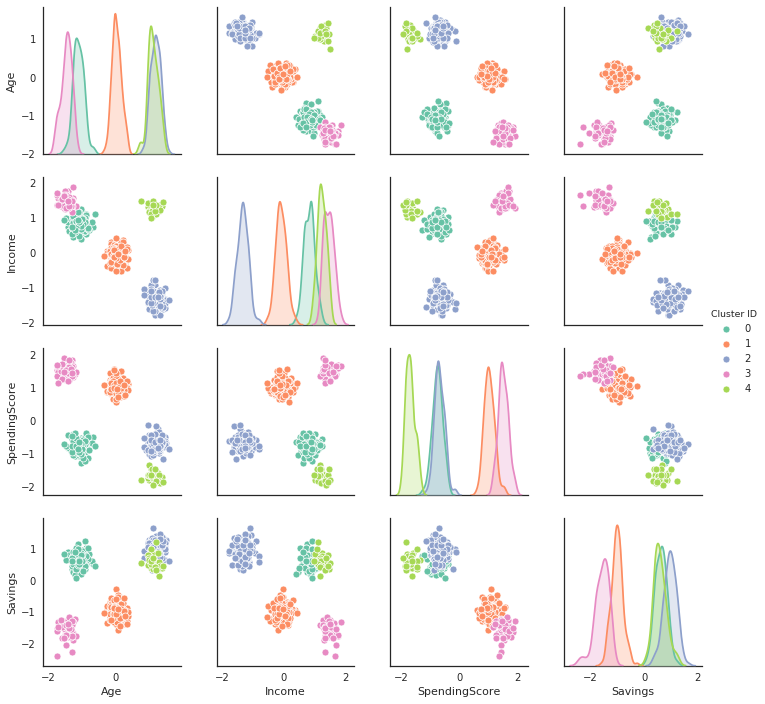

In [39]:
sns.set_style('white')
sns.pairplot(dat_kmeans, vars = ['Age', 'Income', 'SpendingScore', 'Savings'], hue = 'Cluster ID', palette = 'Set2')
plt.show()

In [16]:
sns.set_style('whitegrid')

Plotting the silhouette plot shows no "bad" clusters (no instances with < 0.6)

In [17]:
from yellowbrick.cluster import SilhouetteVisualizer, InterclusterDistance, KElbowVisualizer

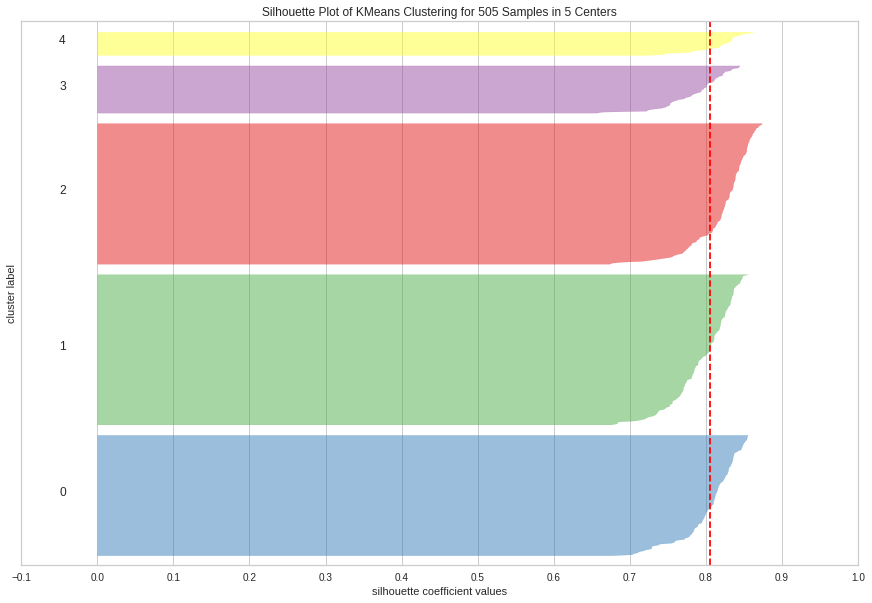

In [18]:
fig, ax = plt.subplots(figsize = (15,10))
visualizer = SilhouetteVisualizer(k_means, ax = ax)
visualizer.fit(dat_sc)
visualizer.poof()
#fig = visualizer.ax.get_figure()

Elbow plot shows that 5 clusters is clearly the best:

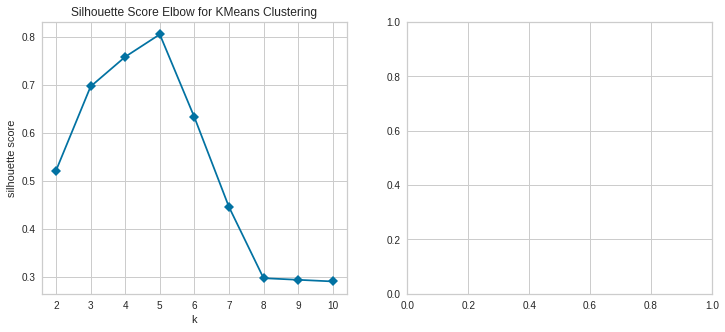

/global/home/mma_nnguyen/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/global/home/mma_nnguyen/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/global/home/mma_nnguyen/.local/lib/python3.6/site-packages/sklearn/utils/deprecation.py:85: DeprecationWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=DeprecationWarning)
/global/home/mma_nn

In [19]:
fig, ax = plt.subplots(1, 2, figsize = (12,5))

model = KMeans(init='k-means++', n_init=10, max_iter=1000, random_state=42)
KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False, ax = ax[0]).fit(dat_sc).poof();
KElbowVisualizer(model, k=(2,11), metric='calinski_harabaz', timings=False, ax = ax[1]).fit(dat_sc).poof();
# KElbowVisualizer(model, k=(2,11), metric='calinski_harabaz', timings=False).fit(X).poof();
# KElbowVisualizer(model, k=(2,11), metric='distortion', timings=False).fit(X).poof();

In [21]:
from sklearn.metrics import silhouette_score

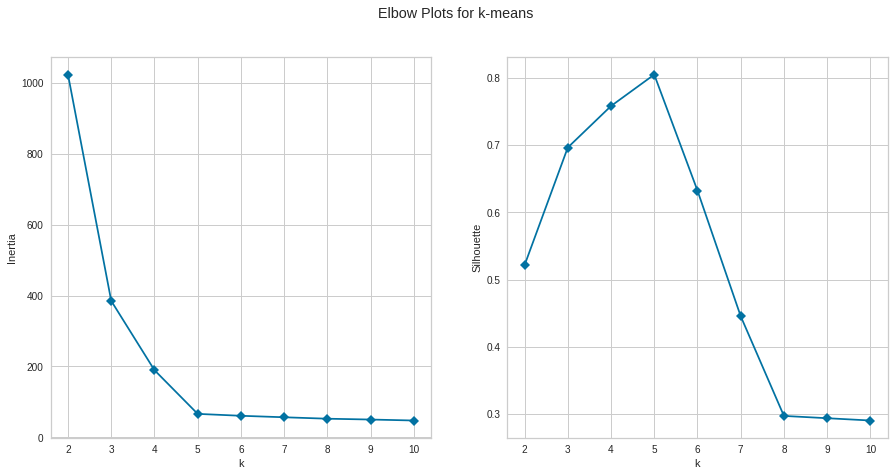

In [22]:
inertias = {}
silhouettes = {}
for k in range(2, 11):
    kmeans = KMeans(init='k-means++', n_init=10, n_clusters=k, max_iter=1000, random_state=42).fit(dat_sc)
    inertias[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    silhouettes[k] = silhouette_score(dat_sc, kmeans.labels_, metric='euclidean')
    
fig, ax = plt.subplots(1, 2, figsize = (15,7))
fig.suptitle('Elbow Plots for k-means')

ax[0].plot(list(inertias.keys()), list(inertias.values()), marker = 'D');
ax[0].set_xlabel('k')
ax[0].set_ylabel('Inertia')

ax[1].plot(list(silhouettes.keys()), list(silhouettes.values()), marker = 'D');
ax[1].set_xlabel('k')
ax[1].set_ylabel('Silhouette')

plt.show()

## Interpretation

There are five distinct clusters:

* Cluster 0: Young, high income, low spending, decent savings
* Cluster 1: avg age, avg income, high spend, very low savings
* Cluster 2: old, low income, low spend, high savings (retired?)
* Cluster 3: young, high income, high spend, no savings
* Cluster 4: old, high income, low spend, decent savings

### Cluster Means

In [23]:
for label in set(k_means.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = dat_sc[k_means.labels_==label].copy()
    X_tmp.loc['mean'] = X_tmp.mean()
    print(X_tmp.tail())


Cluster 0:
           Age    Income  SpendingScore   Savings
477  -1.078938  0.878451      -0.627070  0.613434
482  -1.120404  0.915078      -0.839366  0.977675
498  -1.203336  0.626207      -0.362296  0.900909
500  -1.286268  0.714535      -0.453557  0.621787
mean -1.088152  0.827441      -0.752406  0.627046

Cluster 1:
           Age    Income  SpendingScore   Savings
480   0.247975 -0.119150       1.090334 -0.574015
491  -0.042287 -0.143067       1.539992 -0.890089
492   0.082111 -0.034243       0.721552 -0.925445
495   0.289441  0.042793       0.779483 -1.125742
mean  0.038796 -0.085246       1.027216 -1.005695

Cluster 2:
           Age    Income  SpendingScore   Savings
501   1.409024 -1.545704      -1.164109  1.235201
502   1.284626 -1.118447      -0.578054  0.855313
503   1.326092 -1.524929      -0.579866  1.322452
504   1.243160 -1.258335      -0.831890  0.510463
mean  1.192385 -1.325106      -0.679638  0.970164

Cluster 3:
           Age    Income  SpendingScore   Savings
46

#### Exemplars

In [24]:
from scipy.spatial import distance

for i, label in enumerate(set(k_means.labels_)):
    X_tmp = dat_sc[k_means.labels_==label].copy()
    
    exemplar_idx = distance.cdist([k_means.cluster_centers_[i]], X_tmp).argmin()
    exemplar = pd.DataFrame(X_tmp.iloc[exemplar_idx])
   
    print('\nCluster {}:'.format(label))
    print(exemplar)


Cluster 0:
                    405
Age           -1.037472
Income         0.770100
SpendingScore -0.786483
Savings        0.664874

Cluster 1:
                    467
Age            0.082111
Income        -0.096957
SpendingScore  0.991771
Savings       -0.998383

Cluster 2:
                    335
Age            1.243160
Income        -1.350862
SpendingScore -0.690416
Savings        0.949109

Cluster 3:
                     95
Age           -1.410666
Income         1.541294
SpendingScore  1.575637
Savings       -1.601849

Cluster 4:
                    155
Age            1.118762
Income         1.117318
SpendingScore -1.724288
Savings        0.594762


#### Snake Plot

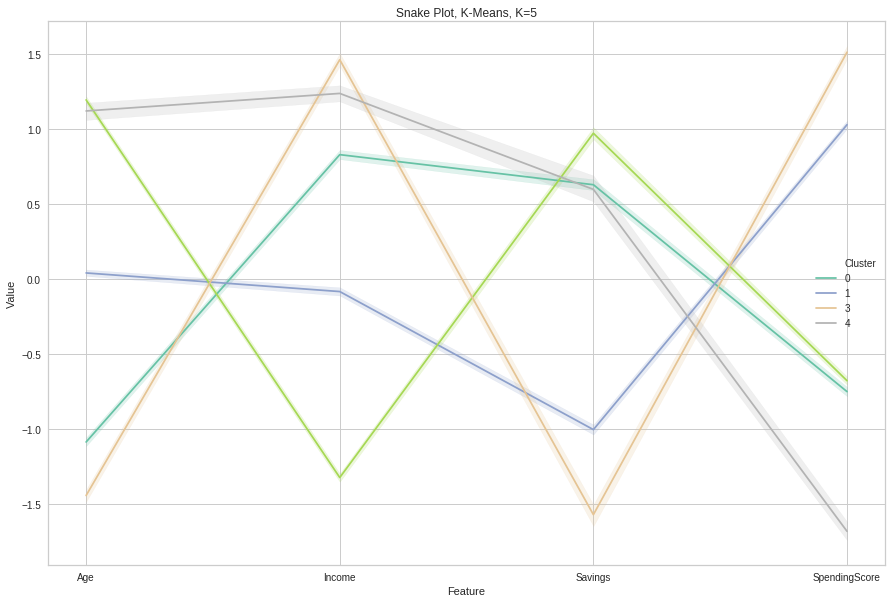

In [25]:
dat_snake = dat_sc.copy()

dat_snake['Cluster'] = k_means.labels_

datamart_melt = pd.melt(dat_snake.reset_index(),
id_vars=['Cluster'],
value_vars=['Age', 'Income', 'SpendingScore', 'Savings'],
var_name='Feature',
value_name='Value')

fig, ax = plt.subplots(figsize = (15,10))
plt.title('Snake Plot, K-Means, K=5')
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=datamart_melt,
            palette = 'Set2')
plt.show()

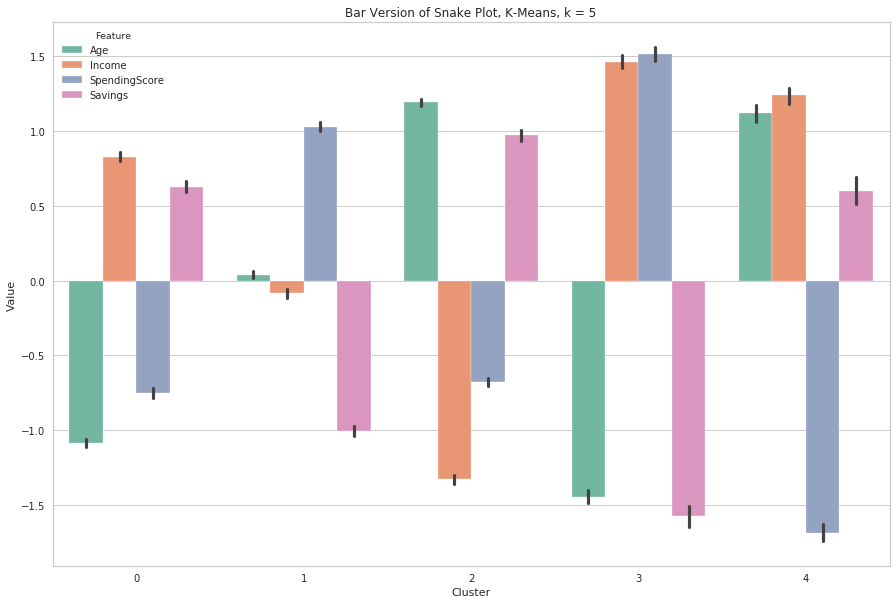

In [26]:
dat_snake = dat_sc.copy()

dat_snake['Cluster'] = k_means.labels_

datamart_melt = pd.melt(dat_snake.reset_index(),
id_vars=['Cluster'],
value_vars=['Age', 'Income', 'SpendingScore', 'Savings'],
var_name='Feature',
value_name='Value')

fig, ax = plt.subplots(figsize = (15,10))
sns.set_style('whitegrid')
plt.title('Bar Version of Snake Plot, K-Means, k = 5')
sns.barplot(x="Cluster", y="Value", hue='Feature', data=datamart_melt,
            palette = 'Set2')
plt.show()

#### Variable Importance

In [27]:
diverging_palette = sns.diverging_palette(10, 220, as_cmap = True)

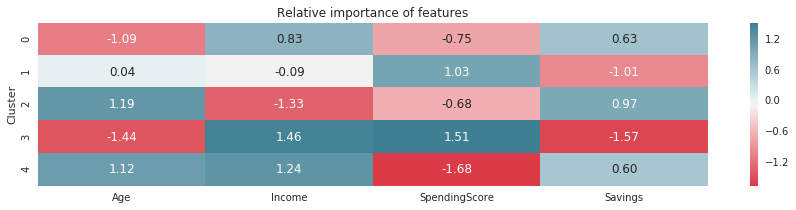

In [28]:
cluster_avg = dat_snake.groupby(['Cluster']).mean()
population_avg = dat_snake.drop(['Cluster'], axis=1).mean()

relative_imp = cluster_avg - population_avg
fig, ax = plt.subplots(figsize = (15, 3))
plt.title('Relative importance of features');
sns.heatmap(data=relative_imp, annot=True, fmt='.2f', cmap=diverging_palette);
plt.show()

### DBSCAN

In [29]:
from sklearn.cluster import DBSCAN
dbscan_model = DBSCAN(eps=0.5, min_samples=4, metric='euclidean')
dbscan_model.fit(dat_sc)

DBSCAN(algorithm='auto', eps=0.5, leaf_size=30, metric='euclidean',
       metric_params=None, min_samples=4, n_jobs=None, p=None)

In [30]:
dbscan_model.labels_

array([0, 0, 0, 0, 1, 2, 0, 1, 1, 1, 3, 4, 4, 4, 0, 3, 0, 1, 1, 3, 4, 3,
       0, 1, 3, 2, 2, 0, 1, 0, 0, 0, 1, 0, 4, 0, 1, 0, 4, 4, 0, 1, 2, 0,
       0, 2, 3, 2, 4, 0, 1, 4, 2, 1, 0, 1, 4, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 2, 2, 0, 0, 4, 1, 1, 4, 0, 4, 0, 0, 2, 0, 3, 0, 1, 1, 4, 4, 0,
       0, 0, 0, 0, 2, 1, 0, 2, 4, 0, 0, 4, 4, 2, 4, 2, 4, 1, 1, 4, 4, 0,
       1, 4, 0, 4, 4, 4, 0, 4, 2, 1, 4, 1, 1, 1, 4, 3, 0, 1, 0, 0, 4, 0,
       4, 0, 2, 1, 3, 2, 0, 4, 1, 0, 0, 2, 0, 2, 0, 3, 0, 1, 0, 4, 1, 0,
       1, 3, 4, 0, 1, 0, 4, 1, 0, 4, 1, 4, 1, 0, 4, 0, 1, 0, 4, 0, 1, 0,
       0, 1, 1, 1, 0, 0, 4, 2, 2, 1, 4, 0, 0, 0, 4, 1, 0, 0, 0, 1, 2, 4,
       1, 1, 1, 4, 0, 4, 0, 4, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 4, 2, 4, 1,
       0, 0, 4, 1, 4, 2, 4, 0, 0, 1, 0, 0, 1, 0, 0, 0, 4, 0, 4, 4, 2, 0,
       0, 0, 3, 0, 4, 1, 2, 2, 2, 1, 0, 4, 1, 1, 4, 4, 0, 0, 3, 0, 0, 1,
       0, 1, 4, 2, 0, 4, 1, 0, 1, 1, 4, 0, 1, 1, 0, 0, 1, 4, 4, 3, 4, 1,
       1, 4, 3, 1, 1, 2, 0, 4, 4, 0, 4, 1, 1, 4, 0,

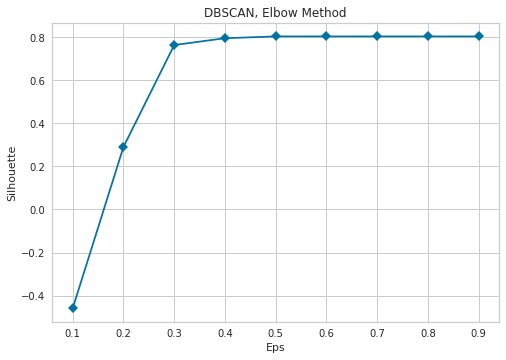

In [31]:
silhouettes = {}
for eps in np.arange(0.1, 1, 0.1):
    db = DBSCAN(eps=eps, min_samples=4).fit(dat_sc)
    silhouettes[eps] = silhouette_score(dat_sc, db.labels_, metric='euclidean')

plt.figure();
plt.plot(list(silhouettes.keys()), list(silhouettes.values()), marker = 'D');
plt.title('DBSCAN, Elbow Method')
plt.xlabel("Eps");
plt.ylabel("Silhouette");
plt.grid(True);
plt.show()

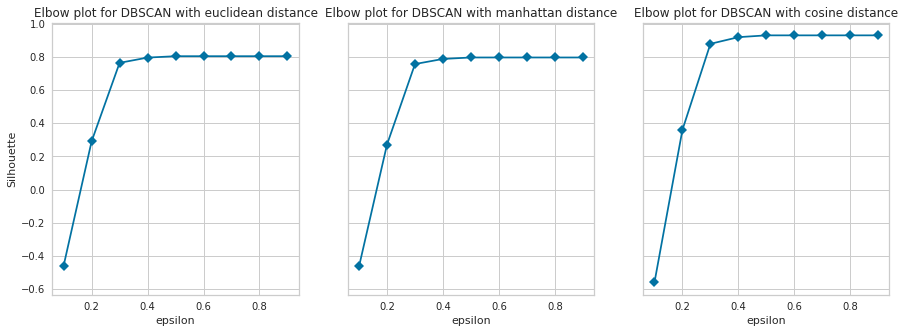

In [32]:
dists = ['euclidean', 'manhattan', 'cosine']
fig, ax = plt.subplots(1, 3, figsize = (15,5), sharey = True)
ax[0].set_ylabel('Silhouette')

for i in range(0, 3):
    silhouettes = {}
    for eps in np.arange(0.1, 1, 0.1):
        db = DBSCAN(eps=eps, min_samples=4).fit(dat_sc)
        silhouettes[eps] = silhouette_score(dat_sc, db.labels_, metric=dists[i])
        
    # fig, ax = plt.subplots(1, 3);
    ax[i].plot(list(silhouettes.keys()), list(silhouettes.values()), marker = 'D');
    #plt.title('DBSCAN, Elbow Method')
    #plt.xlabel("Eps");
    #plt.ylabel("Silhouette");
    #plt.grid(True);
    ax[i].set_title('Elbow plot for DBSCAN with ' + dists[i] + ' distance')
    ax[i].set_xlabel('epsilon')
    
plt.show()

The clusters from DBSCAN are exactly the same as from `k-means++`, just the numbering are different:

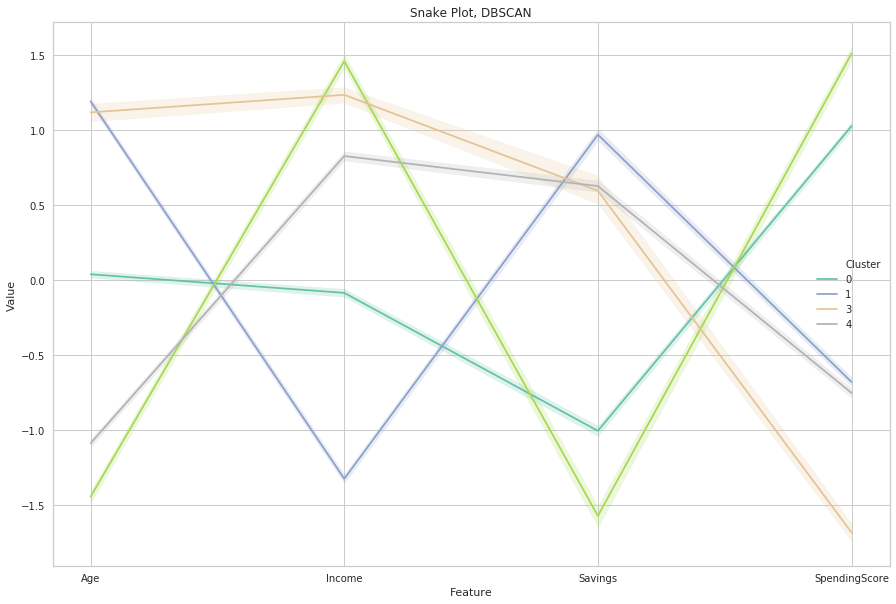

In [33]:
dat_dbscan = dat_sc.copy()

dat_dbscan['Cluster'] = dbscan_model.labels_

dbscan_melt = pd.melt(dat_dbscan.reset_index(),
id_vars=['Cluster'],
value_vars=['Age', 'Income', 'SpendingScore', 'Savings'],
var_name='Feature',
value_name='Value')

fig, ax = plt.subplots(figsize = (15,10))
plt.title('Snake Plot, DBSCAN')
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=dbscan_melt,
            palette = 'Set2')
plt.show()

In [34]:
for label in set(dbscan_model.labels_):
    print('\nCluster {}:'.format(label))
    X_tmp = dat_sc[dbscan_model.labels_==label].copy()
    X_tmp.loc['mean'] = X_tmp.mean()
    print(X_tmp.tail())


Cluster 0:
           Age    Income  SpendingScore   Savings
480   0.247975 -0.119150       1.090334 -0.574015
491  -0.042287 -0.143067       1.539992 -0.890089
492   0.082111 -0.034243       0.721552 -0.925445
495   0.289441  0.042793       0.779483 -1.125742
mean  0.038796 -0.085246       1.027216 -1.005695

Cluster 1:
           Age    Income  SpendingScore   Savings
501   1.409024 -1.545704      -1.164109  1.235201
502   1.284626 -1.118447      -0.578054  0.855313
503   1.326092 -1.524929      -0.579866  1.322452
504   1.243160 -1.258335      -0.831890  0.510463
mean  1.192385 -1.325106      -0.679638  0.970164

Cluster 2:
           Age    Income  SpendingScore   Savings
466  -1.700928  1.340611       1.162288 -1.505162
487  -1.369200  1.320782       1.848446 -1.515115
496  -1.535064  1.597305       1.483239 -1.824853
499  -1.410666  1.477079       1.201559 -1.405315
mean -1.444668  1.460507       1.510580 -1.572496

Cluster 3:
           Age    Income  SpendingScore   Savings
38

### Hierarchical

In [35]:
from sklearn.cluster import AgglomerativeClustering
agg = AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='ward')
agg.fit(dat_sc)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=5,
                        pooling_func='deprecated')

Again, hierarchical clustering creates the same clusters as the other two algorithms:

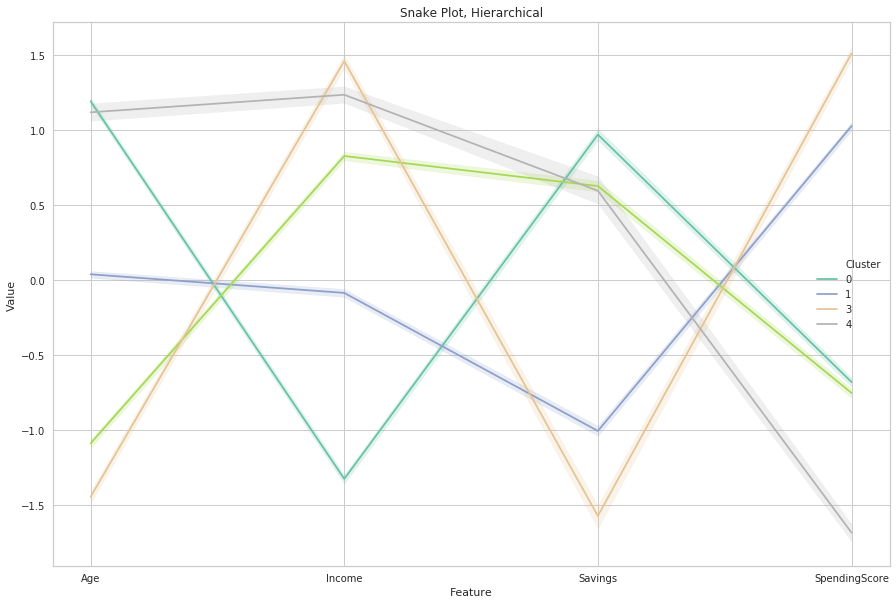

In [36]:
dat_agg = dat_sc.copy()

dat_agg['Cluster'] = agg.labels_

agg_melt = pd.melt(dat_agg.reset_index(),
id_vars=['Cluster'],
value_vars=['Age', 'Income', 'SpendingScore', 'Savings'],
var_name='Feature',
value_name='Value')

fig, ax = plt.subplots(figsize = (15,10))
plt.title('Snake Plot, Hierarchical')
sns.lineplot(x="Feature", y="Value", hue='Cluster', data=agg_melt,
            palette = 'Set2')
plt.show()

#### Elbow Plot

Let's plot the elbow plot for each linkage:

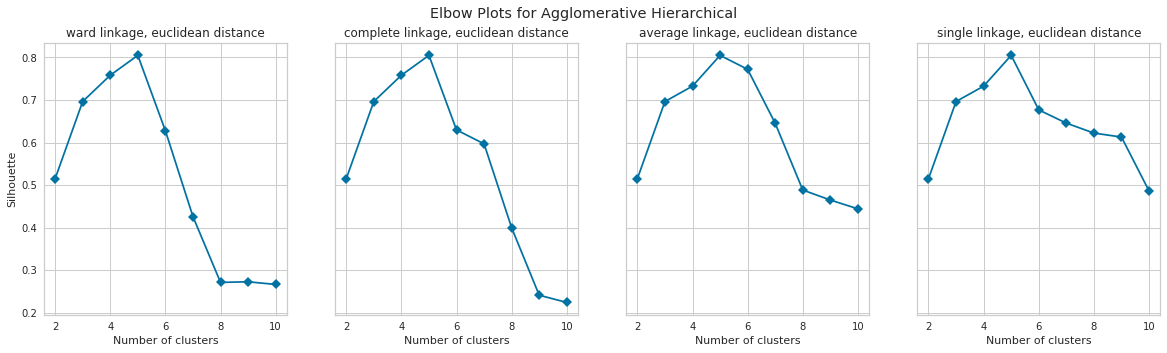

In [37]:
linkages = ['ward', 'complete', 'average', 'single']
dist = ['euclidean', 'cosine']
fig, ax = plt.subplots(1, 4, figsize = (20,5), sharey = True)
ax[0].set_ylabel('Silhouette')
fig.suptitle('Elbow Plots for Agglomerative Hierarchical')

for i in range(0, 4):
    model = AgglomerativeClustering(affinity=dist[0], linkage=linkages[i])
    KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=False, ax = ax[i]).fit(dat_sc)
    ax[i].set_title(linkages[i] + ' linkage, ' + dist[0] + ' distance')
    ax[i].set_xlabel('Number of clusters')
    # KElbowVisualizer(model, k=(2,11), metric='calinski_harabaz', timings=False).fit(dat_sc).poof();
    # KElbowVisualizer(model, k=(2,11), metric='distortion', timings=False).fit(X).poof();
    
plt.show()

#### Dendogram

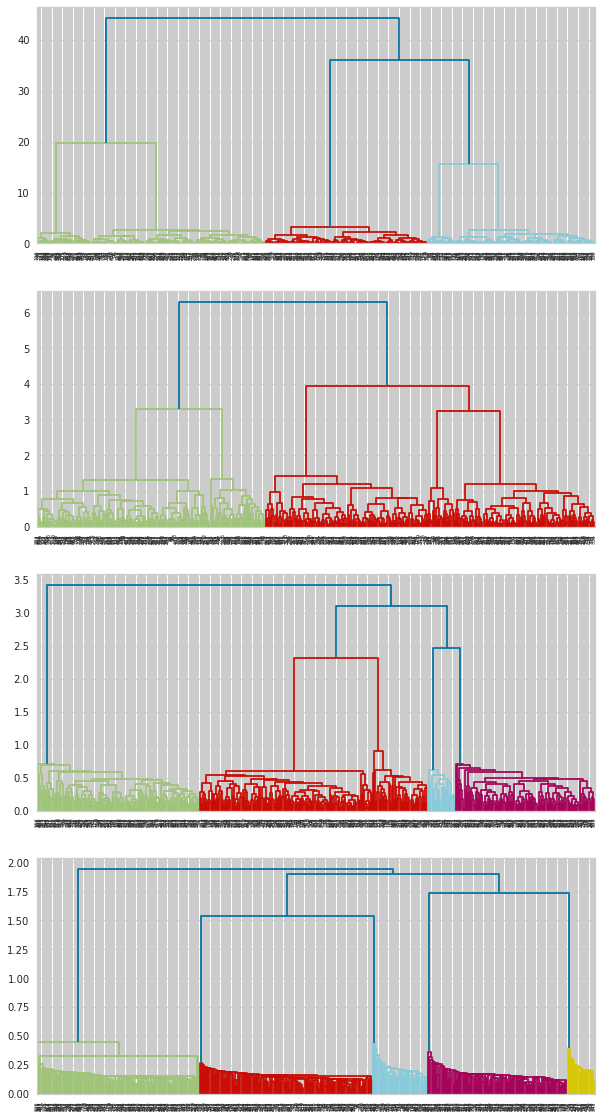

In [35]:
linkages = ['ward', 'complete', 'average', 'single']
fig, ax = plt.subplots(4, 1, figsize = (10,20))

for i in range(0,4):
    agg_sc = scipy.cluster.hierarchy.linkage(dat_sc, method = linkages[i], metric = 'euclidean')

    #plt.figure(figsize = (20,10))
    #plt.grid(which = 'major', axis = 'x')
    #plt.title('Jewelry Dendogram, ward linkage, euclidean distance, ')
    scipy.cluster.hierarchy.dendrogram(agg_sc, ax = ax[i])
plt.show()

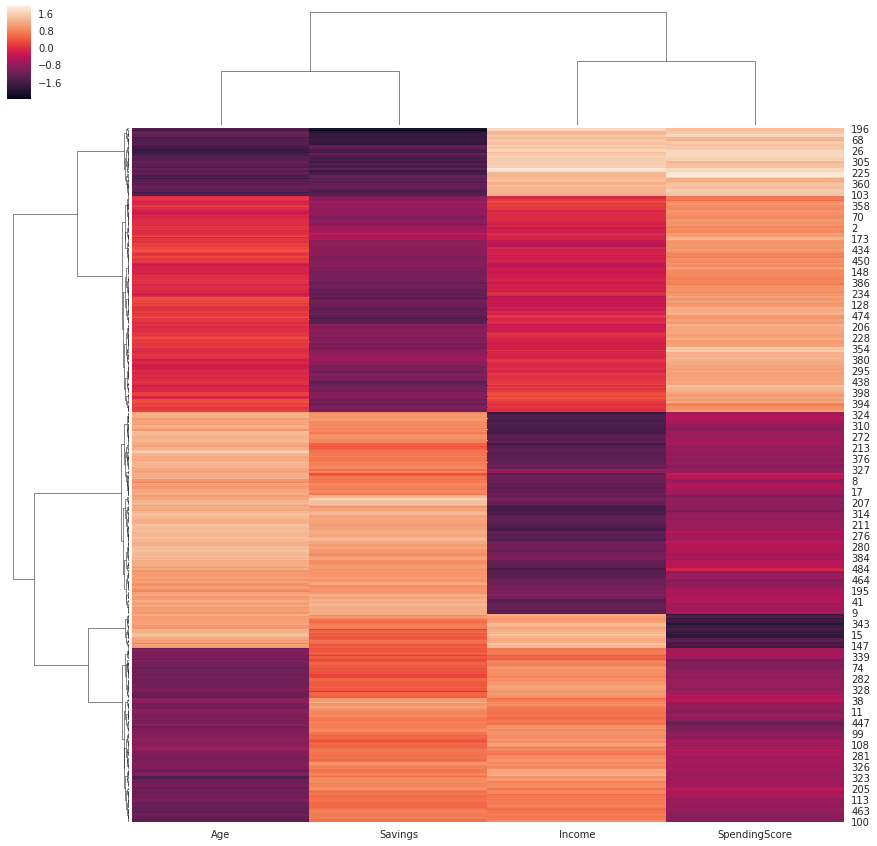

In [36]:
sns.clustermap(dat_sc, figsize = (15,15), method = 'ward')
plt.show()